In [1]:
# collect data
import os
import numpy as np
import pandas as pd

root = "./Moth/"
folder = os.listdir(root)
datasets = {}
for fold in folder:
    subfolder = os.listdir(root + fold)
    for subfold in subfolder:
        name = (fold + "/" + subfold)
        subsubfolder = os.listdir(root + fold + "/" + subfold)
        for subsubfold in subsubfolder:
            #print(fold + "/" + subfold + "/" + subsubfold)
            if "MOTH" in subsubfold:
                try:
                    moth_data = pd.read_csv(root + fold + "/" + subfold + "/" + subsubfold)
                    moth_data = np.array(moth_data[list(moth_data.keys())[0]])
                except: 
                    print('Empty Moth Dataset, skipping ' + name)
                    moth_data = None
            elif "WEATHER" in subsubfold:
                try:
                    weather_data = pd.read_csv(root + fold + "/" + subfold + "/" + subsubfold)
                    weather_data = np.array(weather_data[list(weather_data.keys())])
                except:# EmptyDataError:
                    print('Empty Weather Dataset, skipping ' + name)
                    weather_data = None
        dataset = {'moth':moth_data, 'weather':weather_data}
        datasets.update({name:dataset})

In [2]:
from datetime import datetime

dataset = datasets['Trap L1/0720']
weather = dataset['weather']
moth = dataset['moth']

timept = weather[0][0]
d0 = datetime.strptime(timept, "%m/%d/%y %H:%M:%S")
print(timept)
for l in range(len(weather)):
    timept = weather[l][0]
    d = datetime.strptime(timept, "%m/%d/%y %H:%M:%S")
    delta = d - d0
    weather[l][0] = delta.total_seconds()

for l in range(len(moth)):
    timept = moth[l]
    d = datetime.strptime(timept, "%m/%d/%y %H:%M:%S")
    delta = d - d0
    moth[l] = delta.total_seconds()

data = pd.DataFrame(weather.astype('float'))
y = pd.DataFrame(moth.astype('float'))
print(np.shape(data))
print(np.shape(y))

01/01/00 00:04:04
(1578, 6)
(1069, 1)


# Short Window - Random Forest

In [3]:
import DFE_object

Calculated average on dataset Entry_0 at 2023-05-18 13:42:07.413772.
Calculated variance on dataset Entry_0 at 2023-05-18 13:42:07.493864.
Calculated skewness on dataset Entry_0 at 2023-05-18 13:42:09.589772.
Calculated kurtosis on dataset Entry_0 at 2023-05-18 13:42:11.366590.
Calculated peak_count on dataset Entry_0 at 2023-05-18 13:42:11.382177.
Calculated RMS on dataset Entry_0 at 2023-05-18 13:42:11.429051.
Calculated average on dataset Entry_1 at 2023-05-18 13:42:11.475928.


{'R': 0.68, 'RMSE': 0.68, 'RelRMSE': 0.08, 'MAE': 0.56, 'RAE': 0.78}

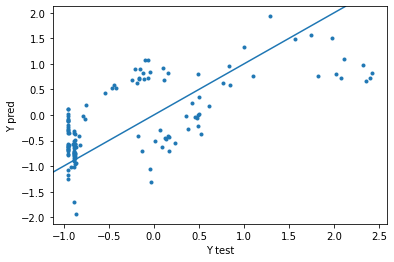

In [4]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(data, t = 0)
dfeo.import_from_pandas(y, y = 0)

# Feature Extraction
dfeo.set_window_scheme(length = 300, overlap = 150) # set windowing scheme
dfeo.fe_average("Entry_0")
dfeo.fe_variance("Entry_0")
dfeo.fe_skewness("Entry_0")
dfeo.fe_kurtosis("Entry_0")
dfeo.fe_peak_count("Entry_0")
dfeo.fe_RMS("Entry_0")

t = np.array(dfeo.data_in["Entry_0"]['raw_data'])[:,0]
dfeo.KDE("Entry_1", t) # this assumes linear alignment with weather dataset, which is valid in this case
dfeo.fe_average("Entry_1")

dfeo.normalize("Entry_0_average")
dfeo.normalize("Entry_0_variance")
dfeo.normalize("Entry_0_skewness")
dfeo.normalize("Entry_0_kurtosis")
dfeo.normalize("Entry_0_peak_count")
dfeo.normalize("Entry_0_RMS")
dfeo.normalize("Entry_1_average")

# Fusion
dfeo.concatenate()

# Dimension Reduction: PCA
dfeo.my_PCA("active")

# Regression
dfeo.linear_regression()
dfeo.regression_report()


# Medium Window - Random Forest

Calculated average on dataset Entry_0 at 2023-05-18 13:42:11.694109.
Calculated variance on dataset Entry_0 at 2023-05-18 13:42:11.727222.
Calculated skewness on dataset Entry_0 at 2023-05-18 13:42:12.160186.
Calculated kurtosis on dataset Entry_0 at 2023-05-18 13:42:12.588590.
Calculated peak_count on dataset Entry_0 at 2023-05-18 13:42:12.604252.
Calculated RMS on dataset Entry_0 at 2023-05-18 13:42:12.604252.
Calculated average on dataset Entry_1 at 2023-05-18 13:42:12.635499.


{'R': 0.64, 'RMSE': 0.74, 'RelRMSE': 0.18, 'MAE': 0.64, 'RAE': 0.9}

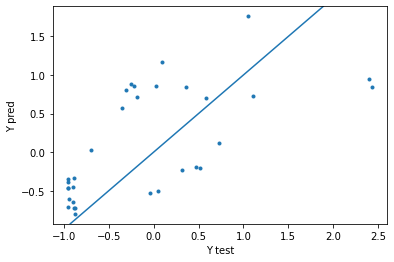

In [5]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(data, t = 0)
dfeo.import_from_pandas(y, y = 0)

# Feature Extraction
dfeo.set_window_scheme(length = 1200, overlap = 600) # 20 minutes
dfeo.fe_average("Entry_0")
dfeo.fe_variance("Entry_0")
dfeo.fe_skewness("Entry_0")
dfeo.fe_kurtosis("Entry_0")
dfeo.fe_peak_count("Entry_0")
dfeo.fe_RMS("Entry_0")

t = np.array(dfeo.data_in["Entry_0"]['raw_data'])[:,0]
dfeo.KDE("Entry_1", t) # this assumes linear alignment with weather dataset, which is valid in this case
dfeo.fe_average("Entry_1")

dfeo.normalize("Entry_0_average")
dfeo.normalize("Entry_0_variance")
dfeo.normalize("Entry_0_skewness")
dfeo.normalize("Entry_0_kurtosis")
dfeo.normalize("Entry_0_peak_count")
dfeo.normalize("Entry_0_RMS")
dfeo.normalize("Entry_1_average")

# Fusion
dfeo.concatenate()

# Dimension Reduction: PCA
dfeo.my_PCA("active")

# Regression
dfeo.linear_regression()
dfeo.regression_report()


# Long Window - Random Forest

Calculated average on dataset Entry_0 at 2023-05-18 13:42:12.794121.
Calculated variance on dataset Entry_0 at 2023-05-18 13:42:12.810930.
Calculated skewness on dataset Entry_0 at 2023-05-18 13:42:12.957860.
Calculated kurtosis on dataset Entry_0 at 2023-05-18 13:42:13.121318.
Calculated peak_count on dataset Entry_0 at 2023-05-18 13:42:13.136991.
Calculated RMS on dataset Entry_0 at 2023-05-18 13:42:13.136991.
Calculated average on dataset Entry_1 at 2023-05-18 13:42:13.152568.


{'R': 0.6, 'RMSE': 0.55, 'RelRMSE': 0.28, 'MAE': 0.47, 'RAE': 0.83}

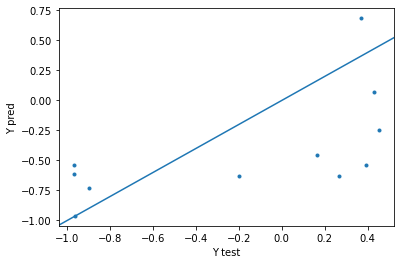

In [6]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(data, t = 0)
dfeo.import_from_pandas(y, y = 0)

# Feature Extraction
dfeo.set_window_scheme(length = 3600, overlap = 1800) # 20 minutes
dfeo.fe_average("Entry_0")
dfeo.fe_variance("Entry_0")
dfeo.fe_skewness("Entry_0")
dfeo.fe_kurtosis("Entry_0")
dfeo.fe_peak_count("Entry_0")
dfeo.fe_RMS("Entry_0")

t = np.array(dfeo.data_in["Entry_0"]['raw_data'])[:,0]
dfeo.KDE("Entry_1", t) # this assumes linear alignment with weather dataset, which is valid in this case
dfeo.fe_average("Entry_1")

dfeo.normalize("Entry_0_average")
dfeo.normalize("Entry_0_variance")
dfeo.normalize("Entry_0_skewness")
dfeo.normalize("Entry_0_kurtosis")
dfeo.normalize("Entry_0_peak_count")
dfeo.normalize("Entry_0_RMS")
dfeo.normalize("Entry_1_average")

# Fusion
dfeo.concatenate()

# Dimension Reduction: PCA
dfeo.my_PCA("active")

# Regression
dfeo.linear_regression()
dfeo.regression_report()
